In [1]:
import sys
sys.path.insert(0, '..')
# sys.path.insert(1, '../python/')
# import root_numpy as rnp
import uproot4
import python.file_manager as fm
import ROOT

Welcome to JupyROOT 6.24/06


In [2]:
input_dir = '/eos/cms/store/cmst3/group/l1tr/cerminar/hgcal/CMSSW1110pre6/DoubleElectron_FlatPt-1To100/DoubleElectron_FlatPt-1To100_PU200_v64C/'
tree_name = 'l1CaloTriggerNtuplizer_egOnly/HGCalTriggerNtuple'
maxEvents = 10
debug = 2

In [3]:
input_files = []
range_ev = (0, maxEvents)
input_files = fm.get_files_for_processing(input_dir=input_dir,
                                          tree=tree_name,
                                          nev_toprocess=maxEvents,
                                          debug=debug)

print('- will read {} files from dir {}:'.format(len(input_files), input_dir))
for file_name in input_files:
    print('        - {}'.format(file_name))

# ntuple = HGCalNtuple(input_files, tree=params.tree_name)

tree = ROOT.TChain(tree_name)

glb_files = []
for file_name in input_files:
    protocol = ''
    if '/eos/user/' in file_name:
        protocol = 'root://eosuser.cern.ch/'
    elif '/eos/cms/' in file_name:
        protocol = 'root://eoscms.cern.ch/'
    tree.Add(protocol+file_name)
    glb_files.append(protocol+file_name)

# self._tree = ROOT.TChain(tree)
#     def getEvent(self, index):
#         """Returns Event for a given bindex"""
#         ientry = self._tree.LoadTree(index)
#         if ientry < 0:


# for evt_idx in range(range_ev[0], range_ev[1]+1):
#     # print(evt_idx)
#     event = ntuple.getEvent(evt_idx)
#     ev_manager.read(event, debug)

    

dir already indexed, will read metadata...
[]
copy file: fe663560-1fbd-4f06-990d-7f90f6f81998.json ret: True
- will read 1 files from dir /eos/cms/store/cmst3/group/l1tr/cerminar/hgcal/CMSSW1110pre6/DoubleElectron_FlatPt-1To100/DoubleElectron_FlatPt-1To100_PU200_v64C/:
        - /eos/cms/store/cmst3/group/l1tr/cerminar/hgcal/CMSSW1110pre6/DoubleElectron_FlatPt-1To100/DoubleElectron_FlatPt-1To100_PU200_v64C/210304_174938/0000/ntuple_1.root


In [104]:
# file =  uproot4.open('root://eoscms.cern.ch//eos/cms/store/cmst3/group/l1tr/cerminar/l1teg/ntuples/MinBias_TuneCP5_14TeV-pythia8/NuGunAllEta_PU200_v91G/230404_115207/0000/ntuple_1.root')
file =  uproot4.open('root://eoscms.cern.ch//eos/cms/store/cmst3/group/l1tr/cerminar/l1teg/ntuples/DoubleElectron_FlatPt-1To100-gun/DoubleElectron_FlatPt-1To100_PU200_v91G/230404_115147/0000/ntuple_36.root')
tree = file['l1EGTriggerNtuplizer_l1tCorr']['L1TEGTriggerNtuple']
arr = tree.arrays(['L2TkEle_pt', 'L2TkEle_eta'], library='pd', entry_start=0, entry_stop=2000)
arr.rename(columns={'L2TkEle_pt':'pt', 'L2TkEle_eta':'eta','pippo': 'pluto' }, inplace=True)
# arr.reset_index(level=[0], drop=True, inplace=True)


In [105]:
file.keys()

['l1EGTriggerNtuplizer_l1tCorr;1',
 'l1EGTriggerNtuplizer_l1tCorr/L1TEGTriggerNtuple;1']

In [106]:
tree.keys()

['run',
 'event',
 'lumi',
 'gen_n',
 'gen_PUNumInt',
 'gen_TrueNumInt',
 'vtx_x',
 'vtx_y',
 'vtx_z',
 'gen_eta',
 'gen_phi',
 'gen_pt',
 'gen_energy',
 'gen_charge',
 'gen_pdgid',
 'gen_status',
 'gen_daughters',
 'simpart_eta',
 'simpart_phi',
 'simpart_pt',
 'simpart_energy',
 'simpart_dvx',
 'simpart_dvy',
 'simpart_dvz',
 'simpart_ovx',
 'simpart_ovy',
 'simpart_ovz',
 'simpart_mother',
 'simpart_exphi',
 'simpart_exeta',
 'simpart_exx',
 'simpart_exy',
 'simpart_fbrem',
 'simpart_pid',
 'simpart_gen',
 'simpart_reachedEE',
 'simpart_fromBeamPipe',
 'simpart_posx',
 'simpart_posy',
 'simpart_posz',
 'l1Trk_n',
 'l1Trk_pt',
 'l1Trk_pt2stubs',
 'l1Trk_eta',
 'l1Trk_phi',
 'l1Trk_curv',
 'l1Trk_chi2',
 'l1Trk_chi2Red',
 'l1Trk_nStubs',
 'l1Trk_z0',
 'l1Trk_charge',
 'l1Trk_caloeta',
 'l1Trk_calophi',
 'EGStaEB_n',
 'EGStaEB_pt',
 'EGStaEB_energy',
 'EGStaEB_eta',
 'EGStaEB_phi',
 'EGStaEB_hwQual',
 'EGStaEE_n',
 'EGStaEE_pt',
 'EGStaEE_energy',
 'EGStaEE_eta',
 'EGStaEE_phi',
 'EGSt

In [115]:
tree.num_entries

1120

In [116]:
arr

,pt,eta
0,[],[]
1,"[69.0, 68.5, 5.0]","[0.043718453496694565, 0.008436894975602627, -..."
2,"[91.0, 90.75, 10.75]","[1.369844913482666, -1.3874856233596802, -1.77..."
3,[54.25],[-1.2655341625213623]
4,[61.5],[-0.8291166424751282]
...,...,...
1115,"[103.75, 96.0, 4.75]","[2.015650749206543, -2.0248546600341797, 0.846..."
1116,"[84.25, 80.25]","[1.9151750802993774, -1.945854663848877]"
1117,[15.0],[1.4051264524459839]
1118,[13.5],[1.422767162322998]


In [117]:
arr.pt

0                         []
1          [69.0, 68.5, 5.0]
2       [91.0, 90.75, 10.75]
3                    [54.25]
4                     [61.5]
                ...         
1115    [103.75, 96.0, 4.75]
1116          [84.25, 80.25]
1117                  [15.0]
1118                  [13.5]
1119                      []
Name: pt, Length: 1120, dtype: awkward

In [118]:
arr.query('pt > 3')

ValueError: cannot convert to RegularArray because subarray lengths are not regular (in compiled code: https://github.com/scikit-hep/awkward/blob/awkward-cpp-15/awkward-cpp/src/cpu-kernels/awkward_ListOffsetArray_toRegularArray.cpp#L22)

This error occurred while calling

    numpy.asarray(
        <Array [[], [True, True, True], ..., []] type='1120 * var * bool'>
        dtype[bool_]-instance
    )

In [119]:
import awkward as ak


In [120]:
pdarr = ak.to_dataframe(tree.arrays(['gen_eta', 'gen_phi', 'gen_pt', 'gen_energy', 'gen_charge', 'gen_pdgid', 'gen_status', 'gen_daughters'], library='ak', entry_start=0, entry_stop=2000))
# pdarr.rename(columns={'L2TkEle_pt':'pt', 'L2TkEle_eta':'eta','pippo': 'pluto' }, inplace=True)


In [121]:
pdarr

,,,gen_eta,gen_phi,gen_pt,gen_energy,gen_charge,gen_pdgid,gen_status,gen_daughters
entry,subentry,subsubentry,,,,,,,,


In [15]:
pdarr.loc[1893]

gen_eta   gen_phi    gen_pt   gen_energy   
subentry subsubentry                                                  
0        0            29756.000000  0.000000  0.000000  7000.000000  \
         1            29756.000000  0.000000  0.000000  7000.000000   
         2            29756.000000  0.000000  0.000000  7000.000000   
         3            29756.000000  0.000000  0.000000  7000.000000   
         4            29756.000000  0.000000  0.000000  7000.000000   
...                            ...       ...       ...          ...   
559      1               -6.788464 -0.942188  0.387145   171.805298   
562      0               -8.117439  1.924046  0.174612   292.686981   
         1               -8.117439  1.924046  0.174612   292.686981   
595      0                2.247229 -2.533930  0.392430     1.882067   
         1                2.247229 -2.533930  0.392430     1.882067   

                      gen_charge  gen_pdgid  gen_status  gen_daughters  
subentry subsubentry                                                    
0        0                     1       2212           4            207  
         1                     1       2212           4            237  
         2                     1       2212           4            255  
         3                     1       2212           4            261  
         4                     1       2212           4            269  
...                          ...        ...         ...            ...  
559      1                     0        111           2            615  
562      0                     0        111           2            616  
         1                     0        111           2            617  
595      0                     0        111           2            618  
         1                     0        111           2            619  

[1463 rows x 8 columns]

In [21]:
pdarr.query('gen_pt > 3')

gen_eta   gen_phi     gen_pt  gen_energy   
entry subentry subsubentry                                              
0     4        0           -3.559023  1.442887  13.419331  235.893814  \
      5        0           -4.351026 -1.698705  13.419331  520.474731   
      8        0           -3.726464  1.253810  17.820433  370.273407   
      9        0           -4.095040 -1.568326  11.668798  350.404602   
      10       0           -2.231208 -2.385658   7.673581   36.136837   
...                              ...       ...        ...         ...   
1919  835      33           3.332251  2.199959   4.314413   60.481922   
               34           3.332251  2.199959   4.314413   60.481922   
               35           3.332251  2.199959   4.314413   60.481922   
               36           3.332251  2.199959   4.314413   60.481922   
               37           3.332251  2.199959   4.314413   60.481922   

                            gen_charge  gen_pdgid  gen_status  gen_daughters  
entry subentry subsubentry                                                    
0     4        0                     0         21          23              8  
      5        0                     0         21          23              9  
      8        0                     0         21          44             13  
      9        0                     0         21          44             14  
      10       0                     0         21          43             15  
...                                ...        ...         ...            ...  
1919  835      33                    0         21          71            875  
               34                    0         21          71            876  
               35                    0         21          71            877  
               36                    0         21          71            878  
               37                    0         21          71            879  

[259051 rows x 8 columns]

In [122]:
tkele = tree.arrays(['pt', 'eta'], library='ak', entry_start=0, entry_stop=2000, aliases={'pt': 'L2TkEle_pt',  
                                                                                                  'eta': 'L2TkEle_eta'})


In [123]:
tkele 

<Array [{pt: [], eta: []}, ..., {pt: [], ...}] type='1120 * {pt: var * floa...'>

In [124]:
gen = tree.arrays(['pt', 'eta', 'pdgid'], library='ak', entry_start=0, entry_stop=2000, aliases={'pt': 'gen_pt',  
                                                                                        'eta': 'gen_eta',
                                                                                        'pdgid': 'gen_pdgid'})


In [125]:
gen

<Array [{pt: [8.55, ...], eta: ..., ...}, ...] type='1120 * {pt: var * floa...'>

In [191]:
gen[(abs(gen.pdgid) == 11 )][:, 0]

<Array [{pt: 8.55, eta: 0.82, ...}, ..., {...}] type='1120 * {pt: float32, ...'>

In [130]:
tkele[1]

<Record {pt: [69, ..., 5], eta: [...]} type='{pt: var * float32, eta: var *...'>

In [201]:
gen_eta0 = gen.eta[:, 0]
gen_eta0

<Array [0.82, -0.0272, -1.38, ..., 2.64, 2.59, -2.83] type='1120 * float32'>

In [202]:
ak.argcartesian([tkele.eta, gen_eta0])

AxisError: axis=1 exceeds the depth of this array (1)

This error occurred while calling

    ak.argcartesian(
        arrays = [<Array [[], [0.0437, 0.00844, -1.14], ..., []] type='1120 *...
        axis = 1
        nested = None
        parameters = None
        with_name = None
        highlevel = True
        behavior = None
    )

In [199]:
match_eta = ak.cartesian([tkele.eta, gen.eta])
match_pt = ak.cartesian([tkele.pt, gen.pt])
match_idx = ak.argcartesian([tkele.eta, gen.eta])

In [194]:
match_eta

<Array [[], [(0.0437, ..., ...), ...], ..., []] type='1120 * var * (float32...'>

In [155]:
match_idx

<Array [[], [(0, 0), ..., (2, ...)], ..., []] type='1120 * var * (int64, in...'>

In [153]:
match_eta

<Array [[], [(0.0437, ..., ...), ...], ..., []] type='1120 * var * (float32...'>

In [156]:
ele_eta, gen_eta = ak.unzip(match_eta)
ele_pt, gen_pt = ak.unzip(match_eta)
ele_idx, gen_idx = ak.unzip(match_idx)


In [147]:
import numpy as np

In [174]:
dr = np.abs(ele_eta-gen_eta)
dr

<Array [[], [0.0709, 0.0165, ..., 1.17], ..., []] type='1120 * var * float32'>

In [173]:
dp = np.abs(ele_pt-gen_pt)
dp

<Array [[], [0.0709, 0.0165, ..., 1.17], ..., []] type='1120 * var * float32'>

In [175]:
match = ak.Array(data={'ele_idx': ele_idx, 'gen_idx': gen_idx, 'dpt': dp, 'dr': dr})
sel_match = match[match.dr < 0.1]
sel_match
# sel_match[ak.max(sel_match.dpt)]


<Array [{ele_idx: [], gen_idx: [], ...}, ...] type='1120 * {ele_idx: var * ...'>

In [204]:
sel_match[sel_match.gen_idx == 0]

<Array [{ele_idx: [], gen_idx: [], ...}, ...] type='1120 * {ele_idx: var * ...'>

In [206]:
np.unique(ak.flatten(sel_match.gen_idx))

<Array [0, 1] type='2 * int64'>

In [185]:
# sel_match[ak.max(sel_match.dpt)]
best_match = sel_match[ak.argmin(sel_match.dpt, axis=1, keepdims=True)]
best_match

<Array [{ele_idx: [None], ...}, ..., {...}] type='1120 * {ele_idx: var * ?i...'>

In [186]:
tkele[best_match.ele_idx]

<Array [{pt: [None], eta: [None]}, ..., {...}] type='1120 * {pt: var * ?flo...'>

In [187]:
gen[best_match.gen_idx]

<Array [{pt: [None], eta: [None], ...}, ...] type='1120 * {pt: var * ?float...'>

In [86]:
def selection1(array):
    return array.pt > 3

In [83]:
akarr['pt2'] = akarr.pt *2

In [85]:
akarr[akarr.pt>3]

<Array [{pt: [], L2TkEle_eta: [], ...}, ...] type='1920 * {pt: var * float3...'>

In [90]:
akarr[selection1(akarr)].L2TkEle_eta


<Array [[], [0.428], [], [], ..., [], [], [], []] type='1920 * var * float32'>

In [56]:
select = akarr[ak.count(akarr.L2TkEle_pt, axis=1) > 1]
select

<Array [{L2TkEle_pt: [...], ...}, ..., {...}] type='74 * {L2TkEle_pt: var *...'>

In [75]:
ak.flatten(select.L2TkEle_pt)

<Array [11.8, 4.25, 8.75, 4.75, ..., 9.25, 7.25, 6, 2.75] type='161 * float32'>

In [71]:
select['pt_pair'] = ak.combinations(select.L2TkEle_pt, 2)
select.pt_pair

<Array [[(11.8, 4.25)], ..., [(..., ...), ...]] type='74 * var * (float32, ...'>

In [149]:

import itertools

In [150]:
comb = list(itertools.combinations(arr.loc[1].index, 2))

In [151]:
comb[0]
[i for i in comb[0]]

IndexError: list index out of range

In [51]:
import pandas as pd

In [152]:
c = pd.concat([arr,arr], names=['leg'], keys=[0, 1])
c = c.swaplevel(0,1)
c = c.swaplevel(1,2)



In [153]:
c.sort_values(['entry', 'subentry', 'leg'])

pt       eta
entry subentry leg                
1     0        0    7.25  0.427981
               1    7.25  0.427981
3     0        0    3.00  0.759320
               1    3.00  0.759320
4     0        0    8.50  1.832340
...                  ...       ...
1905  0        1    7.25  1.422767
1908  0        0    1.50 -1.317690
               1    1.50 -1.317690
1912  0        0    7.75  0.008437
               1    7.75  0.008437

[1012 rows x 2 columns]

In [158]:
c.groupby(level='entry')['pt'].count() > 2

entry
1       False
3       False
4       False
13      False
18      False
        ...  
1893     True
1899    False
1905    False
1908    False
1912    False
Name: pt, Length: 419, dtype: bool

In [244]:
re1 = c.query('((leg == 0) & (pt > 10)) | ((leg == 1) & (pt > 5))').groupby(level='entry').filter(
    lambda x : len([(l1, l2) for l1 in x.loc[x.index.get_level_values('leg') == 0].index for l2 in x.loc[x.index.get_level_values('leg') == 1].index if ((l1[2] != l2[2]) and (l1[1] != l2[1]))]) > 0)
re1

pt       eta
entry subentry leg                 
73    0        0    13.00  2.264923
87    0        0    16.50  1.557757
97    0        0    11.00  1.635991
244   0        0    29.75  1.570796
282   0        0    12.25 -1.723427
...                   ...       ...
1812  1        1     8.75 -1.745670
1893  0        1    12.25  0.689524
      1        1     9.25 -0.671884
      2        1     7.25  0.863631
      3        1     6.00 -2.338554

[83 rows x 2 columns]

In [232]:
re = c.loc[(c.index.get_level_values('leg') == 0) & (c.pt>10) | (c.index.get_level_values('leg') == 1) & (c.pt>5)].groupby(level='entry').filter(
    lambda x : len([(l1, l2) for l1 in x.loc[x.index.get_level_values('leg') == 0].index for l2 in x.loc[x.index.get_level_values('leg') == 1].index if ((l1[2] != l2[2]) and (l1[1] != l2[1]))]) > 0)
re

pt       eta
entry subentry leg                 
73    0        0    13.00  2.264923
87    0        0    16.50  1.557757
97    0        0    11.00  1.635991
244   0        0    29.75  1.570796
282   0        0    12.25 -1.723427
...                   ...       ...
1812  1        1     8.75 -1.745670
1893  0        1    12.25  0.689524
      1        1     9.25 -0.671884
      2        1     7.25  0.863631
      3        1     6.00 -2.338554

[83 rows x 2 columns]

In [248]:
re['pt'].count()

83

In [252]:
# WRONG:
re.index.get_level_values('entry').size

83

In [253]:
# CORRECT
re.index.unique('entry').size

24

In [242]:
re.loc[re.index.get_level_values('entry') == 1893]

pt       eta
entry subentry leg                 
1893  0        0    12.25  0.689524
               1    12.25  0.689524
      1        1     9.25 -0.671884
      2        1     7.25  0.863631
      3        1     6.00 -2.338554

In [195]:
c.loc[(c.index.get_level_values('leg') == 0) & (c.pt>10) | (c.index.get_level_values('leg') == 1) & (c.pt>5)].groupby(level='entry').groups[1893]

MultiIndex([(1893, 0, 0),
            (1893, 0, 1),
            (1893, 1, 1),
            (1893, 2, 1),
            (1893, 3, 1)],
           names=['entry', 'subentry', 'leg'])

In [161]:
event = c.loc[1893]

In [179]:
l1 = event.loc[(event.index.get_level_values('leg') == 0) & (event.pt>10)].index.get_level_values('subentry')
l1

Int64Index([0], dtype='int64', name='subentry')

In [180]:
l2= event.loc[(event.index.get_level_values('leg') == 1) & (event.pt>5)].index.get_level_values('subentry')
l2

Int64Index([0, 1, 2, 3], dtype='int64', name='subentry')

AttributeError: 'Int64Index' object has no attribute 'l2'

In [126]:
c.loc[(c.index.get_level_values('leg') == 0) & (c.pt>13)]

,,,pt,eta
entry,subentry,leg,,
87,0,0,16.50,1.557757
236,0,0,16.50,1.675874
244,0,0,29.75,1.570796
256,0,0,15.00,1.317690
286,0,0,14.75,-2.129165


In [124]:
c.loc[(c.index.get_level_values('leg') == 1) & (c.pt>12)]

,,,pt,eta
entry,subentry,leg,,
59,0,1,12.25,-0.235466
73,0,1,13.00,2.264923
87,0,1,16.50,1.557757
236,0,1,16.50,1.675874
244,0,1,29.75,1.570796
256,0,1,15.00,1.317690
282,0,1,12.25,-1.723427
286,0,1,14.75,-2.129165


In [7]:
pippo = arr.loc[arr['pt'].groupby(level='entry', group_keys=False).nlargest(n=1).index, ['pt', 'eta']]

In [8]:
pippo

,,pt,eta
entry,subentry,,
0,18,7.614292,-3.058450
1,38,11.616821,-3.037966
2,69,24.781994,-1.590470
3,196,8.628330,-3.069181
4,164,13.916225,3.015132
...,...,...,...
295,96,79.419678,-1.772598
296,72,11.455150,-3.003231
297,172,10.742501,3.012742


In [14]:
arr.groupby(level=0).apply(func=lambda particle: print(particle.index.get_level_values("entry")))

Int64Index([0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            ...
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           dtype='int64', name='entry', length=306)
Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
           dtype='int64', name='entry', length=308)
Int64Index([2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
            ...
            2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
           dtype='int64', name='entry', length=296)
Int64Index([3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
            ...
            3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
           dtype='int64', name='entry', length=352)
Int64Index([4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
            ...
            4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
           dtype='int64', name='entry', length=336)
Int64Index([5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
            ...
            5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
           dtype='int64', name='entry', length=318)
Int64Index([6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
            ...
            6, 6, 6, 6, 

""


In [15]:
%time 
arr.eval('eta_sel = (eta > 0)', inplace=True)

CPU times: user 1 µs, sys: 1e+03 ns, total: 2 µs
Wall time: 5.25 µs


In [16]:
hash('eta_sel = (eta > 0)')

6349712300507714500

In [17]:
%time 
arr[arr.eta_sel]

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.96 µs


pt       eta  eta_sel
entry subentry                             
0     82        0.910481  3.120265     True
      83        0.000000  3.120265     True
      84        1.062114  3.086529     True
      85        0.000000  3.086529     True
      86        2.171473  3.081200     True
...                  ...       ...      ...
299   327       0.000000  3.177395     True
      328       0.665787  3.151026     True
      329       0.000000  3.151026     True
      330       0.419119  3.162970     True
      331       0.000000  3.162970     True

[47506 rows x 3 columns]

In [65]:
arr.index.get_level_values('entry').unique()



Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            290, 291, 292, 293, 294, 295, 296, 297, 298, 299],
           dtype='int64', name='entry', length=300)

In [64]:
(0,0) in arr.index

True

In [11]:
tree.typenames(['gen_daughters'])


{'gen_daughters': 'std::vector<std::vector<int32_t>>'}

In [27]:
tree['gen_daughters'].show(interpretation_width=80)

name                 | typename                 | interpretation                                                                  
---------------------+--------------------------+---------------------------------------------------------------------------------
gen_daughters        | std::vector<std::vector< | AsObjects(AsVector(True, AsVector(False, dtype('>i4'))))                        

In [18]:
tree['gen_pt'].show(interpretation_width=80)

name                 | typename                 | interpretation                                                                  
---------------------+--------------------------+---------------------------------------------------------------------------------
gen_pt               | std::vector<float>       | AsJagged(AsDtype('>f4'), header_bytes=10)                                       


In [19]:
import numpy as np

In [20]:
gen = tree.arrays(['gen_daughters'], library='pd', entry_start=0, entry_stop=300,interpretation_executor=uproot4.AsObjects(uproot4.AsVector(False, uproot4.AsVector(False, np.dtype('>i4')))))

AttributeError: 'AsObjects' object has no attribute 'submit'

In [ ]:
gen.iloc[0].values[0]

In [23]:
evt_idx = 0
tree.LoadTree(evt_idx)
print(tree.GetEntries())

AttributeError: 'Model_TTree_v20' object has no attribute 'LoadTree'

In [8]:


branches = ["egammaEE_pt", "egammaEE_eta"]
entry = 2
nd_array = rnp.tree2array(tree,
                          branches=branches,
                          start=entry,
                          stop=entry+1,
                          cache_size=400000000)

# nparray = df.Range(0,1,1).AsNumpy(["egammaEE_pt", "egammaEE_eta"])


# print(nparray['egammaEE_pt'], nparray['egammaEE_eta'])



TypeError: tree must be a ROOT.TTree

In [6]:
nd_array

array([(array([ 6.643593  ,  2.9719217 ,  3.9068716 ,  1.5156915 ,  1.300692  ,
        0.        ,  2.9264858 ,  0.2225242 ,  1.2117369 ,  0.        ,
        4.9720078 ,  3.016645  ,  2.7175887 ,  0.73760176,  0.76564455,
        0.        ,  0.5842581 ,  0.        ,  2.025458  ,  0.        ,
        1.0230687 ,  0.        ,  3.6402414 ,  1.5460535 ,  1.0310024 ,
        0.        ,  6.9713054 ,  4.120867  ,  5.0303583 ,  2.6534646 ,
        8.857585  ,  5.3984365 ,  4.317563  ,  2.2437658 ,  6.8248177 ,
        2.0740685 ,  2.9123976 ,  0.4002606 ,  2.3496022 ,  0.45174542,
        3.8635688 ,  1.7373753 ,  5.3682675 ,  2.0934558 ,  6.070648  ,
        3.5421746 ,  2.2283947 ,  0.21598236,  4.280787  ,  2.130282  ,
        4.3815894 ,  1.5497304 ,  2.0520558 ,  0.        ,  1.9534774 ,
        0.        ,  1.7097489 ,  0.        ,  2.9150255 ,  0.04426523,
       10.138936  ,  7.368551  ,  4.427791  ,  2.3982875 ,  4.7439966 ,
        2.8332458 ,  1.9536077 ,  0.        , 19.978153 

In [7]:
dir(df.Display)

NameError: name 'df' is not defined

In [ ]:
data = {}
for idx, branch in enumerate(branches):
    data[branch] = nd_array[branch][0]


In [13]:
df = ROOT.RDF.MakeNumpyDataFrame(data)

In [14]:
for colname in df.GetColumnNames():
    print (colname)

egammaEE_pt
egammaEE_eta


In [8]:
# %load ../NtupleDataFormat.py
# import math
# import collections

from __future__ import print_function
import ROOT
import pandas as pd
import root_numpy as rnp


##########
class HGCalNtuple(object):
    """Class abstracting the whole ntuple/TTree.

    Main benefit is to provide nice interface for
    - iterating over events
    - querying whether hit/seed information exists

    Note that to iteratate over the evets with zip(), you should use
    itertools.izip() instead.
    """

    def __init__(self, fileNames, tree="ana/hgc"):
        """Constructor.

        Arguments:
        fileName -- String for path to the ROOT file
        tree     -- Name of the TTree object inside the ROOT file (default: 'ana/hgc')
        """
        super(HGCalNtuple, self).__init__()
        self._tree = ROOT.TChain(tree)
        self._branches = []
        branch_blacklist = ['tc_wafer',
                            'tc_cell',
                            'tc_waferu',
                            'tc_waferv',
                            'tc_cellu',
                            'tc_cellv',
                            'gen_PUNumInt',
                            'gen_TrueNumInt']

        for file_name in fileNames:
            protocol = ''
            if '/eos/user/' in file_name:
                protocol = 'root://eosuser.cern.ch/'
            elif '/eos/cms/' in file_name:
                protocol = 'root://eoscms.cern.ch/'

            self._tree.Add(protocol+file_name)
            if len(self._branches) == 0:
                self._branches = [br for br in rnp.list_branches(protocol+file_name, tree) if br not in branch_blacklist]
        # print 'Cache size: {}'.format(self._tree.GetCacheSize())

        self._entries = self._tree.GetEntries()

    def setCache(self, learn_events=-1, entry_range=None):
        print('Resetting cache: {}'.format(self._tree.SetCacheSize(0)))
        cachesize = 400000000
        print('Setting new cache size: {}'.format(self._tree.SetCacheSize(cachesize)))
        if learn_events != -1:
            print('Setting # of entries for cache learning: {} to {}'.format(
                self._tree.SetCacheLearnEntries(learn_events), learn_events))
        else:
            print(self._tree.AddBranchToCache("*", True))
            # print self._tree.AddBranchToCache("cl_layer")
            self._tree.StopCacheLearningPhase()

        if entry_range:
            print('Setting cache entry range: {}'.format(
                self._tree.SetCacheEntryRange(entry_range[0], entry_range[-1])))
        print('Cache size: {}'.format(self._tree.GetCacheSize()))

    def PrintCacheStats(self):
        self._tree.PrintCacheStats('cachedbranches')

    def tree(self):
        return self._tree

    def nevents(self):
        return self._entries

    # def hasRawRecHits(self):
    #     """Returns true if the ntuple has raw RecHit information."""
    #     return hasattr(self._tree, "rechit_raw_pt")

    def __iter__(self):
        """Returns generator for iterating over TTree entries (events)

        Generator returns Event objects.

        """
        for jentry in range(self._entries):
            # get the next tree in the chain and verify
            ientry = self._tree.LoadTree(jentry)
            if ientry < 0:
                break
            # copy next entry into memory and verify
            nb = self._tree.GetEntry(jentry)
            if nb <= 0:
                continue

            yield Event(self._tree, jentry, self._branches)

    def getEvent(self, index):
        """Returns Event for a given index"""
        ientry = self._tree.LoadTree(index)
        if ientry < 0:
            return None
        # nb = self._tree.GetEntry(index)  # ientry or jentry?
        # if nb <= 0:
        #     None

        return Event(self._tree, index, self._branches)  # ientry of jentry?


##########
class Event(object):
    """Class abstracting a single event.

    Main benefit is to provide nice interface to get various objects
    or collections of objects.
    """

    def __init__(self, tree, entry, branches):
        """Constructor.

        Arguments:
        tree  -- TTree object
        entry -- Entry number in the tree
        """
        super(Event, self).__init__()
        self._tree = tree
        self._entry = entry
        self._branches = branches

    def entry(self):
        return self._entry

    def event(self):
        """Returns event number."""
        return self._tree.event

    def lumi(self):
        """Returns lumisection number."""
        return self._tree.lumi

    def run(self):
        """Returns run number."""
        return self._tree.run

    def eventId(self):
        """Returns (run, lumi, event) tuple."""
        return (self._tree.run, self._tree.lumi, self._tree.event)

    def eventIdStr(self):
        """Returns 'run:lumi:event' string."""
        return "%d:%d:%d" % self.eventId()

    def getDataFrame(self, prefix, fallback=None):

        branches = [br for br in self._branches
                    if br.startswith(prefix+'_') and
                    not br == '{}_n'.format(prefix)]
        names = ['_'.join(br.split('_')[1:]) for br in branches]

        if len(branches) == 0:
            if fallback is not None:
                return self.getDataFrame(prefix=fallback)
            return pd.DataFrame()

        nd_array = rnp.tree2array(self._tree,
                                  branches=branches,
                                  start=self._entry,
                                  stop=self._entry+1,
                                  cache_size=400000000)

        df = pd.DataFrame(columns=names)
        for idx, branch in enumerate(branches):
            df[names[idx]] = nd_array[branch][0]
        return df


    def getPUInfo(self):
        branches = ['gen_PUNumInt', 'gen_TrueNumInt']
        names = ['PU', 'PUTrue']
        nd_array = rnp.tree2array(self._tree, branches=branches,
                                  start=self._entry, stop=self._entry+1)
        df = pd.DataFrame(columns=names)
        for idx, name in enumerate(names):
            df[name] = [nd_array[0][idx]]
        return df


In [9]:
ntuple = HGCalNtuple(input_files, tree_name)


In [10]:
evt_idx = 0

In [11]:

event = ntuple.getEvent(evt_idx)

In [12]:
import python.collections as coll

In [13]:
coll.tkem_EE.fill(event, debug)

In [21]:
coll.tkem_EE.df.dtypes

pt           float32
energy       float32
eta          float32
phi          float32
hwQual       float32
tkIso        float32
tkIsoPV      float32
pfIso        float32
pfIsoPV      float32
looseTkID       bool
photonID        bool
dtype: object

In [22]:
coll.tkem_EE.df['test'] = 1.
coll.tkem_EE.df.test

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
301    1.0
302    1.0
303    1.0
304    1.0
305    1.0
Name: test, Length: 306, dtype: float64

In [23]:
coll.tkem_EE.df.looseTkID.values

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [24]:
datadict = {}
for col in coll.tkem_EE.df.columns:
    if col in ['looseTkID', 'photonID']:
        continue
    datadict[col] = coll.tkem_EE.df[col].values


In [25]:
datadict

{'pt': array([1.0471219 , 0.        , 0.9309919 , 0.        , 0.8299963 ,
        0.        , 1.8280152 , 0.        , 0.6906006 , 0.        ,
        1.4519302 , 0.        , 0.7814226 , 0.        , 2.0772543 ,
        0.04368379, 3.349274  , 0.7291381 , 7.6142917 , 2.102239  ,
        1.3601102 , 0.        , 1.1078637 , 0.        , 0.949197  ,
        0.        , 2.3532417 , 0.        , 1.8976434 , 0.        ,
        5.507132  , 2.249416  , 1.7864147 , 0.        , 0.6643612 ,
        0.        , 5.1721015 , 1.7180849 , 4.8361177 , 2.3169558 ,
        2.6669288 , 0.2981977 , 5.7898808 , 3.8040826 , 4.3599057 ,
        1.3806417 , 3.8905418 , 0.73756325, 2.363905  , 0.        ,
        1.6467872 , 0.        , 3.2733142 , 1.0909094 , 1.9897656 ,
        0.        , 3.076519  , 0.857164  , 2.0942447 , 0.        ,
        3.735676  , 1.0636082 , 2.2733889 , 0.        , 2.3596497 ,
        0.24583   , 6.138474  , 1.8592441 , 5.7122846 , 2.7330227 ,
        2.0445237 , 0.        , 1.7429491 

In [26]:
rdf = ROOT.RDF.MakeNumpyDataFrame(datadict)
for col in rdf.GetColumns():
    print(col)

AttributeError: 'RDataFrame' object has no attribute 'GetColumns'

In [ ]:
import python.selections as sel

In [ ]:
sel.eg_id_pt_ee_selections

In [ ]:
sel.eg_id_pt_ee_selections[6].selection

In [ ]:
%time rdf.Filter(sel.eg_id_pt_ee_selections[0].selection).Count().GetValue()

In [ ]:
coll.tkem_EE.cached_queries = dict()

In [ ]:
%time coll.tkem_EE.query(sel.eg_id_pt_ee_selections[0])

In [11]:
%time 
htemp = rdf.Filter(sel.eg_id_pt_ee_selections[0].selection).Histo1D(ROOT.RDF.TH1DModel('pippo'+'_pt_temp', 'EG Pt (GeV); p_{T} [GeV]', 100, 0, 100), 'pt')

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 8.82 µs


NameError: name 'rdf' is not defined

In [ ]:
%time htemp.GetValue()

In [ ]:
import numba
import numpy as np

In [ ]:
import numba


@numba.jit
def f_plain(x):
    return x * (x - 1)


@numba.jit
def integrate_f_numba(a, b, N):
    s = 0
    dx = (b - a) / N
    for i in range(N):
        s += f_plain(a + i * dx)
    return s * dx


@numba.jit
def apply_integrate_f_numba(col_a, col_b, col_N):
    n = len(col_N)
    result = np.empty(n, dtype="float64")
    assert len(col_a) == len(col_b) == n
    for i in range(n):
        result[i] = integrate_f_numba(col_a[i], col_b[i], col_N[i])
    return result


def compute_numba(df):
    result = apply_integrate_f_numba(
        df["a"].to_numpy(), df["b"].to_numpy(), df["N"].to_numpy()
    )
    return pd.Series(result, index=df.index, name="result")

@numba.jit

def fill_test(histo, col_a):
    n = len(col_a)
    for i in range(n):
        histo.Fill(col_a[i])




In [ ]:
@numba.jit
def fill_test(histo, col_a):
    n = len(col_a)
    for i in range(n):
        histo.Fill(col_a[i])



In [ ]:
@cython.boundscheck(False)
@cython.wraparound(False)
def fill_h1(hist, np.ndarray[np.double_t, ndim=1] array, np.ndarray[np.double_t, ndim=1] weights=None,
            bool return_indices=False):
    # perform type checking on python side
    cdef TH1* _hist = <TH1*> PyCObject_AsVoidPtr(hist)
    cdef SIZE_t size = array.shape[0]
    cdef np.ndarray[np.int_t, ndim=1] idx = np.empty(0, dtype=np.int)
    cdef SIZE_t i
    cdef int bin_idx
    if return_indices:
        idx = np.empty(size, dtype=np.int)
    if weights is not None:
        for i from 0 <= i < size:
            bin_idx = _hist.Fill(array[i], weights[i])
            if return_indices:
                idx[i] = bin_idx
    else:
        for i from 0 <= i < size:
            bin_idx = _hist.Fill(array[i])
            if return_indices:
                idx[i] = bin_idx
    if return_indices:
        return idx

In [ ]:
coll.tkem_EE.df.pt.values
print (len(coll.tkem_EE.df.phi.values))

In [17]:
myhisto = ROOT.TH1F('name'+'_pt', 'EG Pt (GeV); p_{T} [GeV]', 100, 0, 100)

# apply_integrate_f_numba(coll.tkem_EE.df.pt.values, coll.tkem_EE.df.eta.values, coll.tkem_EE.df.phi.values)

In [28]:
%time fill_test(myhisto, coll.tkem_EE.df.pt.values)

NameError: name 'fill_test' is not defined

In [1]:
ROOT.gROOT.ProcessLine('#include "../src/fastfilling.h"');

NameError: name 'ROOT' is not defined

In [31]:
ROOT.fillTH1Fast1(coll.tkem_EE.df.phi.values)

AttributeError: Failed to get attribute fillTH1Fast1 from ROOT

In [18]:
manager = ROOT.FillerManager()

In [19]:
pts = coll.tkem_EE.df.pt.values

manager.add_1Dhisto(myhisto, pts, coll.tkem_EE.df.looseTkID.values)

   entry: 0 value: 1.04712
   entry: 1 value: 0
   entry: 2 value: 0.930992
   entry: 3 value: 0
   entry: 4 value: 0.829996
   entry: 5 value: 0
   entry: 6 value: 1.82802
   entry: 7 value: 0
   entry: 8 value: 0.690601
   entry: 9 value: 0
   entry: 10 value: 1.45193
   entry: 11 value: 0
   entry: 12 value: 0.781423
   entry: 13 value: 0
   entry: 14 value: 2.07725
   entry: 15 value: 0.0436838
   entry: 16 value: 3.34927
   entry: 17 value: 0.729138
   entry: 18 value: 7.61429
   entry: 19 value: 2.10224
   entry: 20 value: 1.36011
   entry: 21 value: 0
   entry: 22 value: 1.10786
   entry: 23 value: 0
   entry: 24 value: 0.949197
   entry: 25 value: 0
   entry: 26 value: 2.35324
   entry: 27 value: 0
   entry: 28 value: 1.89764
   entry: 29 value: 0
   entry: 30 value: 5.50713
   entry: 31 value: 2.24942
   entry: 32 value: 1.78641
   entry: 33 value: 0
   entry: 34 value: 0.664361
   entry: 35 value: 0
   entry: 36 value: 5.1721
   entry: 37 value: 1.71808
   entry: 38 value: 4.

In [20]:
manager.fill()

SegmentationViolation: void FillerManager::fill() =>
    SegmentationViolation: segfault in C++; program state was reset

# of events: 35053564126224
FILL histo: name_pt: 0x7f862ce3a1c0
   entry: 0 value: [/opt/root/root6/lib/libCore.so] TUnixSystem::DispatchSignals(ESignals) (no debug info)
[/usr/lib/system/libsystem_platform.dylib] _sigtramp (no debug info)
[/usr/lib/system/libsystem_malloc.dylib] tiny_free_no_lock (no debug info)
[<unknown binary>] (no debug info)
[<unknown binary>] (no debug info)
[/opt/root/root6/lib/libcppyy_backend3_8.so] WrapperCall(long, unsigned long, void*, void*, void*) (no debug info)
[/opt/root/root6/lib/libcppyy3_8.so] CPyCppyy::(anonymous namespace)::VoidExecutor::Execute(long, void*, CPyCppyy::CallContext*) (no debug info)
[/opt/root/root6/lib/libcppyy3_8.so] CPyCppyy::CPPMethod::ExecuteFast(void*, long, CPyCppyy::CallContext*) (no debug info)
[/opt/root/root6/lib/libcppyy3_8.so] CPyCppyy::CPPMethod::ExecuteProtected(void*, long, CPyCppyy::CallContext*) (no debug info)
[/opt/root/root6/lib/libcppyy3_8.so] CPyCppyy::CPPMethod::Call(CPyCppyy::CPPInstance*&, _object*, _objec

 *** Break *** segmentation violation


In [ ]:
pts

In [9]:
impo
from hist import Hist


In [10]:
h = Hist(hist.axis.Regular(bins=10, start=0, stop=1, name="x"))
h.fill(0.9)

Hist(Regular(10, 0, 1, name='x'), storage=Double()) # Sum: 1.0

In [11]:
import boost_histogram as bh

In [36]:

# Compose axis however you like; this is a 2D histogram
hist2d = bh.Histogram(bh.axis.Regular(2, 0, 1),
                    bh.axis.Regular(4, 0.0, 1.0))

# Filling can be done with arrays, one per dimension
hist2d.fill([.3, .5, .2],
          [.1, .4, .9])

# NumPy array view into histogram counts, no overflow bins
counts = hist.view()


In [37]:
hist2d.lable = "ciccio"


In [38]:
hist2d

Histogram(
  Regular(2, 0, 1),
  Regular(4, 0, 1),
  storage=Double()) # Sum: 3.0

In [29]:
import matplotlib.pyplot as plt


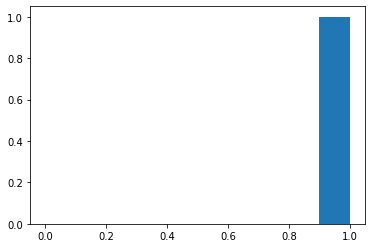

In [31]:
plt.bar(h.axes[0].centers, h, h.axes[0].widths);

In [32]:
h.label = "pippo"
h.axes[0].label='un asse'

In [50]:
h.name = "name h; X [GeV]"

In [51]:
h.label
h.axes[0]

Regular(10, 0, 1, name='x', label='un asse')

In [52]:
root_file = uproot4.recreate("demo_uproot_file.root")
root_file["words"] = "See what is in the ROOT File!"
root_file[h.name] = h.to_numpy()
root_file['ugo'] = hist2d.to_numpy()


In [57]:
h_uproot = uproot4.to_writable(h)
h_pyroot = uproot4.pyroot.to_pyroot(h_uproot)


In [58]:
h_pyroot

In [59]:
h_pyroot.GetTitle()

'name h; X [GeV]'

In [61]:
h_pyroot.GetXaxis().GetTitle()

'un asse'

In [62]:
root_file['test'] = h_pyroot